In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [7]:
tickers = ['TQQQ','TMF','BND','BIL']
data = yf.download(tickers)['Adj Close']
data = data[tickers]
for c in data.columns:
    print(c, data[c].first_valid_index())
assets = data.dropna().copy()

print('asset \n', assets)

[*********************100%***********************]  4 of 4 completed
TQQQ 2010-02-11 00:00:00
TMF 2009-04-16 00:00:00
BND 2007-04-10 00:00:00
BIL 2007-05-30 00:00:00
asset 
                  TQQQ        TMF        BND        BIL
Date                                                  
2010-02-11   0.431471   6.695424  55.449619  86.560036
2010-02-12   0.433238   6.771187  55.526741  86.560036
2010-02-16   0.450019   6.831800  55.596817  86.560036
2010-02-17   0.457656   6.613166  55.470654  86.503395
2010-02-18   0.466332   6.500601  55.393574  86.541161
...               ...        ...        ...        ...
2022-12-05  22.230000   9.230000  72.919998  91.449997
2022-12-06  20.820000   9.590000  73.160004  91.480003
2022-12-07  20.570000  10.230000  73.800003  91.480003
2022-12-08  21.299999  10.160000  73.589996  91.540001
2022-12-09  20.889999   9.380000  73.160004  91.529999

[3231 rows x 4 columns]


          TQQQ       TMF       BND       BIL
TQQQ  1.000000  0.519881  0.809128  0.813562
TMF   0.519881  1.000000  0.841021  0.561974
BND   0.809128  0.841021  1.000000  0.833154
BIL   0.813562  0.561974  0.833154  1.000000


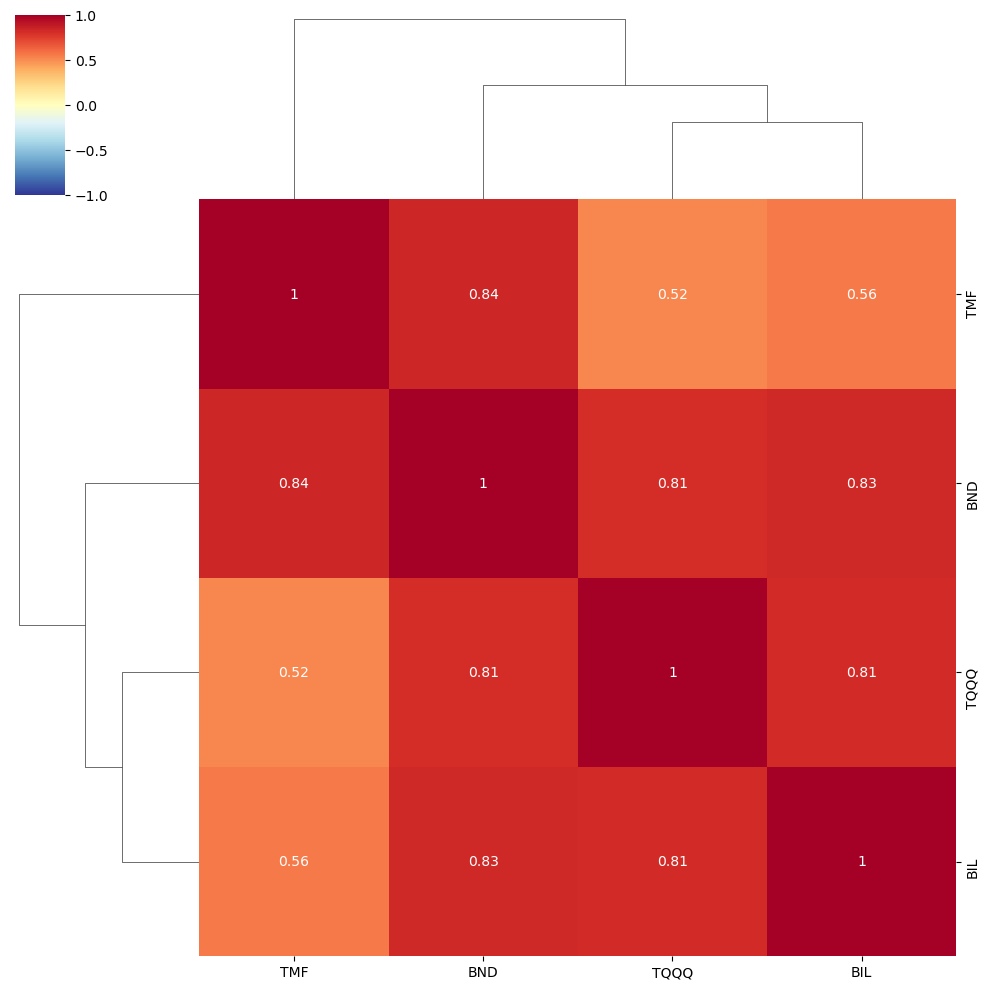

In [8]:
corr = assets.corr()
print(corr)
sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1) #컬러차트 -1 ~ 1 범위로 표시

(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), array([0, 1, 2, 3, 1, 2, 3, 2, 3, 3]))


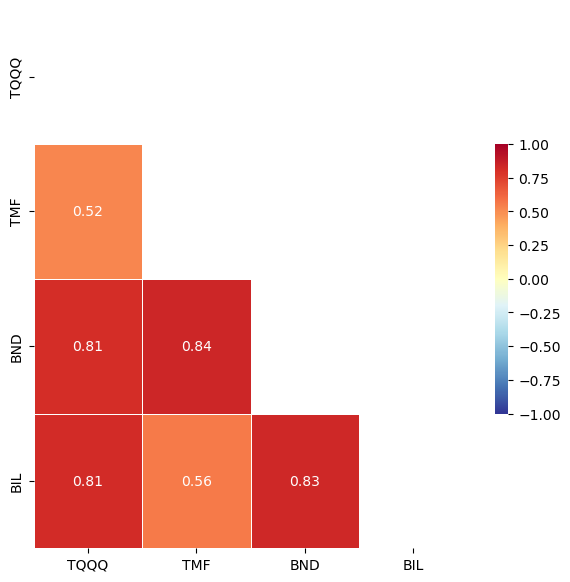

In [15]:
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(7,7))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
print(np.triu_indices_from(mask))

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            annot_kws = {'size':10},
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1)   # 컬러바 범위 -1 ~ 1
plt.show()